In [2]:
import os
import pandas as pd
import pm4py

Data Loading:

In [4]:
file_dir = '../data/'
file_name = 'Hospital_Billing_Eventlog.xes'
download_url = 'https://data.4tu.nl/file/6af6d5f0-f44c-49be-aac8-8eaa5fe4f6fd/28b83e72-375e-4da4-8459-a8506e898edf'
# Check if file exists and download it if not

# Check if directory exists
if not os.path.exists(file_dir):
    os.system("mkdir " + file_dir)
if not os.path.exists(file_dir + file_name):
    print('Downloading file...')
    os.system(f'wget -O {file_dir + file_name + ".gz"} {download_url}')
    os.system(f'gzip -d {file_dir + file_name + ".gz"}')


In [3]:
data = pm4py.read_xes(file_dir + file_name)
data = pm4py.format_dataframe(data)

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 100000/100000 [00:33<00:00, 2994.51it/s]


In [4]:
# Get overview over data
data

,isCancelled,diagnosis,time:timestamp,caseType,speciality,org:resource,concept:name,blocked,isClosed,flagD,...,closeCode,actRed,actOrange,flagC,msgCount,version,msgType,msgCode,@@index,@@case_index
0,False,A,2012-12-16 19:33:10+00:00,A,A,ResA,NEW,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,NaN,NaN,2013-12-15 19:00:37+00:00,NaN,NaN,NaN,FIN,NaN,NaN,NaN,...,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,NaN,NaN,2013-12-16 03:53:38+00:00,NaN,NaN,NaN,RELEASE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
3,NaN,NaN,2013-12-17 12:56:29+00:00,NaN,NaN,NaN,CODE OK,NaN,NaN,NaN,...,NaN,False,False,False,0.0,A,NaN,NaN,3,0
4,NaN,NaN,2013-12-19 03:44:31+00:00,NaN,NaN,ResB,BILLED,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451354,False,UE,2015-06-27 02:01:17+00:00,A,H,ResA,NEW,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,451354,99999
451355,NaN,NaN,2015-07-06 23:57:45+00:00,NaN,NaN,NaN,FIN,NaN,NaN,NaN,...,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,451355,99999
451356,NaN,NaN,2015-07-15 05:39:38+00:00,NaN,NaN,NaN,RELEASE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,451356,99999
451357,NaN,NaN,2015-07-15 06:33:01+00:00,NaN,NaN,NaN,CODE OK,NaN,NaN,NaN,...,NaN,False,False,False,0.0,E,NaN,NaN,451357,99999


Preprocessing:

In [3]:
# print columns
data = data[['@@case_index', 'diagnosis', 'concept:name', 'isCancelled', 'isClosed']]
data

NameError: name 'data' is not defined

In [6]:
# Save as new, smaller csv
data.to_csv('../data/preprocessed_data.csv', sep=';', index=False)

Feature Extraction:

In [2]:
# Overview over unique values for each column
data = pd.read_csv('../data/preprocessed_data.csv', sep=';')
print("Unique value oveview:\n")
print("======================")
print(data.nunique())
print("======================")
unique_states = data["concept:name"].unique()

Unique value oveview:

@@case_index    100000
diagnosis         1191
concept:name        18
isCancelled          2
isClosed             2
dtype: int64


# Full Data Extraction

In [3]:
# Get traces
full_data = pm4py.read_xes("../data/Hospital_Billing_Eventlog.xes")

traces = full_data.groupby('case:concept:name')['concept:name'].apply(tuple).reset_index().rename(columns={'case:concept:name': 'case_id', 'concept:name': 'trace'})

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 100000/100000 [00:33<00:00, 2971.42it/s]


In [4]:
traces

,@@case_index,Traces
0,0,"(NEW, FIN, RELEASE, CODE OK, BILLED)"
1,1,"(NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL..."
2,2,"(NEW,)"
3,3,"(NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL..."
4,4,"(NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL..."
...,...,...
99995,99995,"(NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL..."
99996,99996,"(NEW, DELETE)"
99997,99997,"(NEW, CHANGE DIAGN, DELETE)"
99998,99998,"(NEW,)"


In [4]:
# Get the value counts for each unique trace
trace_counts = traces['trace'].value_counts()

# Convert to dictionary
trace_counts_dict = trace_counts.to_dict()

In [6]:
trace_counts_dict

{('NEW', 'CHANGE DIAGN', 'FIN', 'RELEASE', 'CODE OK', 'BILLED'): 33672,
 ('NEW',): 22373,
 ('NEW', 'FIN', 'RELEASE', 'CODE OK', 'BILLED'): 20901,
 ('NEW', 'DELETE'): 4813,
 ('NEW', 'FIN'): 3508,
 ('NEW',
  'CHANGE DIAGN',
  'CHANGE DIAGN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED'): 2121,
 ('NEW', 'CHANGE DIAGN', 'DELETE'): 1555,
 ('NEW', 'FIN', 'RELEASE', 'CODE NOK', 'BILLED'): 977,
 ('NEW',
  'CHANGE DIAGN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'REOPEN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED'): 869,
 ('NEW', 'FIN', 'RELEASE', 'CODE OK', 'BILLED', 'CODE OK'): 512,
 ('NEW', 'FIN', 'RELEASE', 'CODE NOK', 'EMPTY'): 400,
 ('NEW', 'FIN', 'RELEASE', 'BILLED'): 359,
 ('NEW',
  'CHANGE DIAGN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED',
  'STORNO',
  'REJECT',
  'BILLED'): 314,
 ('NEW',
  'FIN',
  'RELEASE',
  'CODE OK',
  'REOPEN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED'): 273,
 ('NEW',
  'CHANGE DIAGN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED',
  'STORNO',
  'REJECT


### Counter Vectorizer 
1. Getting Unique pages and trace_count_dict as dataframe
2. Converting Traces to Strings 
3. Creating CounterVectorizer 
4. Using Vectorizer with traces to create dataframe

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


df = pd.DataFrame(list(trace_counts_dict.items()), columns=['Traces', 'Count'])
traces = [' '.join(trace) for trace in trace_counts_dict.keys()]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(traces) 
df_vectorized = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


### Clustering Algorithm DBSCAN:
1. Clustering of Traces based on vectorized Dataframe with DBSCAN

In [7]:
from sklearn.cluster import DBSCAN


eps = 0.1 
min_samples = 2  

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
dbscan.fit(df_vectorized)

df['Cluster'] = dbscan.labels_
df_sorted = df.sort_values(by='Cluster')

df_sorted.to_csv('../data/clustered_traces_countvectorized_dbscan.csv', index=False)

cluster_sizes = df_sorted['Cluster'].value_counts().sort_index()
for cluster_id, size in cluster_sizes.items():
    print(f"Cluster {cluster_id}: {size} Traces")

Cluster -1: 739 Traces
Cluster 0: 3 Traces
Cluster 1: 4 Traces
Cluster 2: 3 Traces
Cluster 3: 4 Traces
Cluster 4: 2 Traces
Cluster 5: 2 Traces
Cluster 6: 3 Traces
Cluster 7: 2 Traces
Cluster 8: 2 Traces
Cluster 9: 3 Traces
Cluster 10: 2 Traces
Cluster 11: 2 Traces
Cluster 12: 3 Traces
Cluster 13: 2 Traces
Cluster 14: 2 Traces
Cluster 15: 2 Traces
Cluster 16: 3 Traces
Cluster 17: 5 Traces
Cluster 18: 2 Traces
Cluster 19: 3 Traces
Cluster 20: 4 Traces
Cluster 21: 2 Traces
Cluster 22: 2 Traces
Cluster 23: 2 Traces
Cluster 24: 2 Traces
Cluster 25: 2 Traces
Cluster 26: 4 Traces
Cluster 27: 4 Traces
Cluster 28: 3 Traces
Cluster 29: 2 Traces
Cluster 30: 2 Traces
Cluster 31: 3 Traces
Cluster 32: 2 Traces
Cluster 33: 2 Traces
Cluster 34: 4 Traces
Cluster 35: 2 Traces
Cluster 36: 2 Traces
Cluster 37: 2 Traces
Cluster 38: 2 Traces
Cluster 39: 3 Traces
Cluster 40: 2 Traces
Cluster 41: 2 Traces
Cluster 42: 2 Traces
Cluster 43: 2 Traces
Cluster 44: 2 Traces
Cluster 45: 2 Traces
Cluster 46: 3 Traces


### Evaluation:
Silhouette Coefficient: distance between the clusters 

In [8]:
from sklearn.metrics import silhouette_score,silhouette_samples

if len(set(dbscan.labels_)) > 1:  
    silhouette_avg = silhouette_score(df_vectorized, dbscan.labels_)
    print(f"Silhouette Coefficient AVG: {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(df_vectorized, dbscan.labels_)
    for i in range(len(set(dbscan.labels_)) - 1):  
        ith_cluster_silhouette_values = sample_silhouette_values[dbscan.labels_ == i]
        print(f"Silhouette Coefficient for cluster {i}: {np.mean(ith_cluster_silhouette_values)}")
else:
    print("Only one cluster found. No Silhouette Coefficient.")

Silhouette Coefficient AVG: -0.22186519083214457
Silhouette Coefficient for cluster 0: 1.0
Silhouette Coefficient for cluster 1: 1.0
Silhouette Coefficient for cluster 2: 1.0
Silhouette Coefficient for cluster 3: 1.0
Silhouette Coefficient for cluster 4: 1.0
Silhouette Coefficient for cluster 5: 1.0
Silhouette Coefficient for cluster 6: 1.0
Silhouette Coefficient for cluster 7: 1.0
Silhouette Coefficient for cluster 8: 1.0
Silhouette Coefficient for cluster 9: 1.0
Silhouette Coefficient for cluster 10: 1.0
Silhouette Coefficient for cluster 11: 1.0
Silhouette Coefficient for cluster 12: 1.0
Silhouette Coefficient for cluster 13: 1.0
Silhouette Coefficient for cluster 14: 1.0
Silhouette Coefficient for cluster 15: 1.0
Silhouette Coefficient for cluster 16: 1.0
Silhouette Coefficient for cluster 17: 1.0
Silhouette Coefficient for cluster 18: 1.0
Silhouette Coefficient for cluster 19: 1.0
Silhouette Coefficient for cluster 20: 1.0
Silhouette Coefficient for cluster 21: 1.0
Silhouette Coef

### Visualization:

- Using TSNE to visualize results

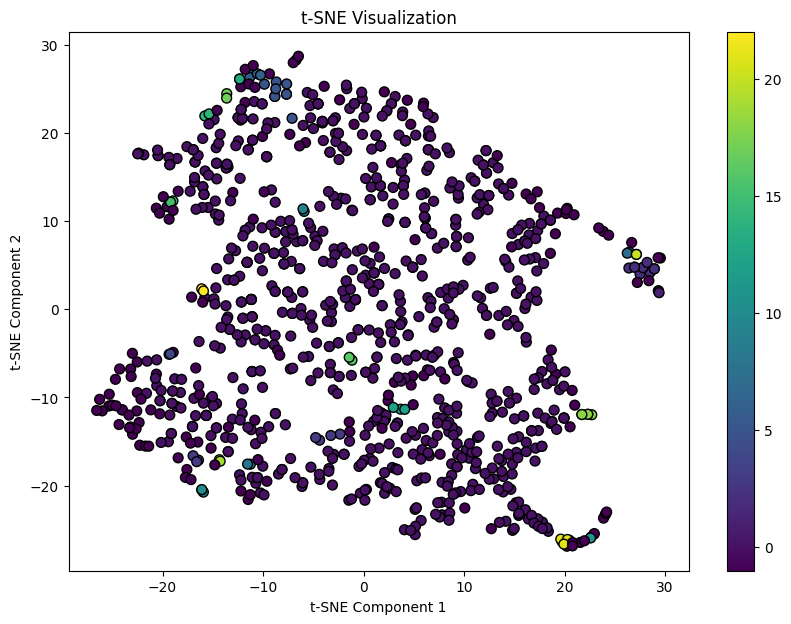

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


tsne = TSNE(n_components=2, perplexity=50, max_iter=1000)
tsne_result = tsne.fit_transform(df_vectorized)
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=dbscan.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()


### Postprocessing: Petri-Net for every Cluster 

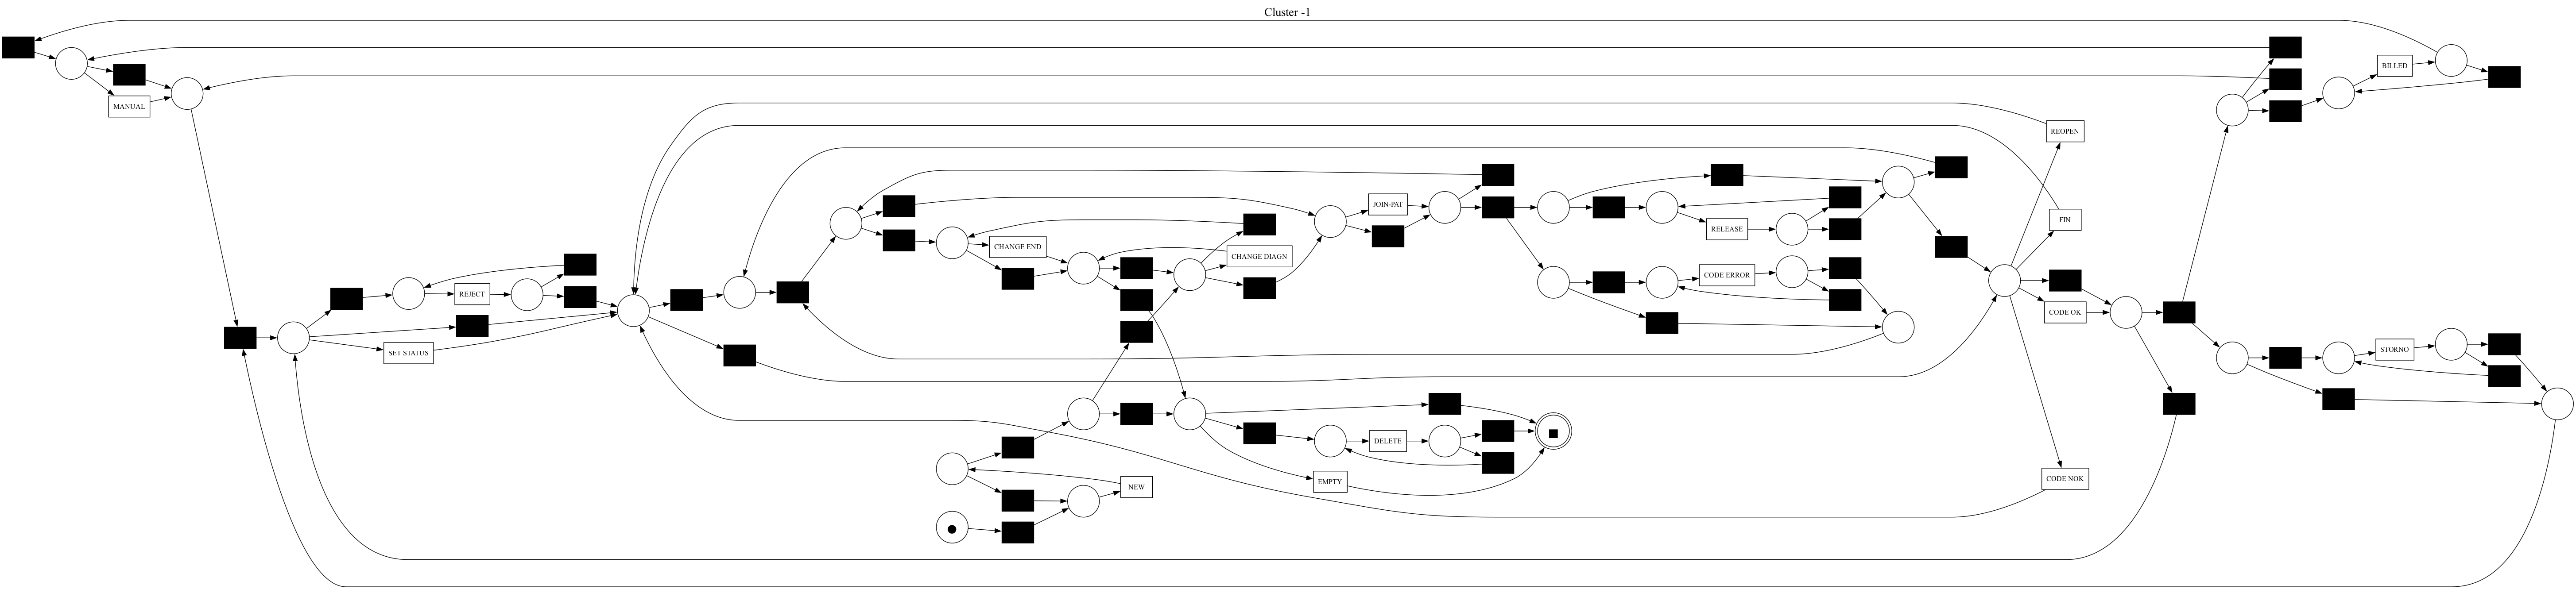

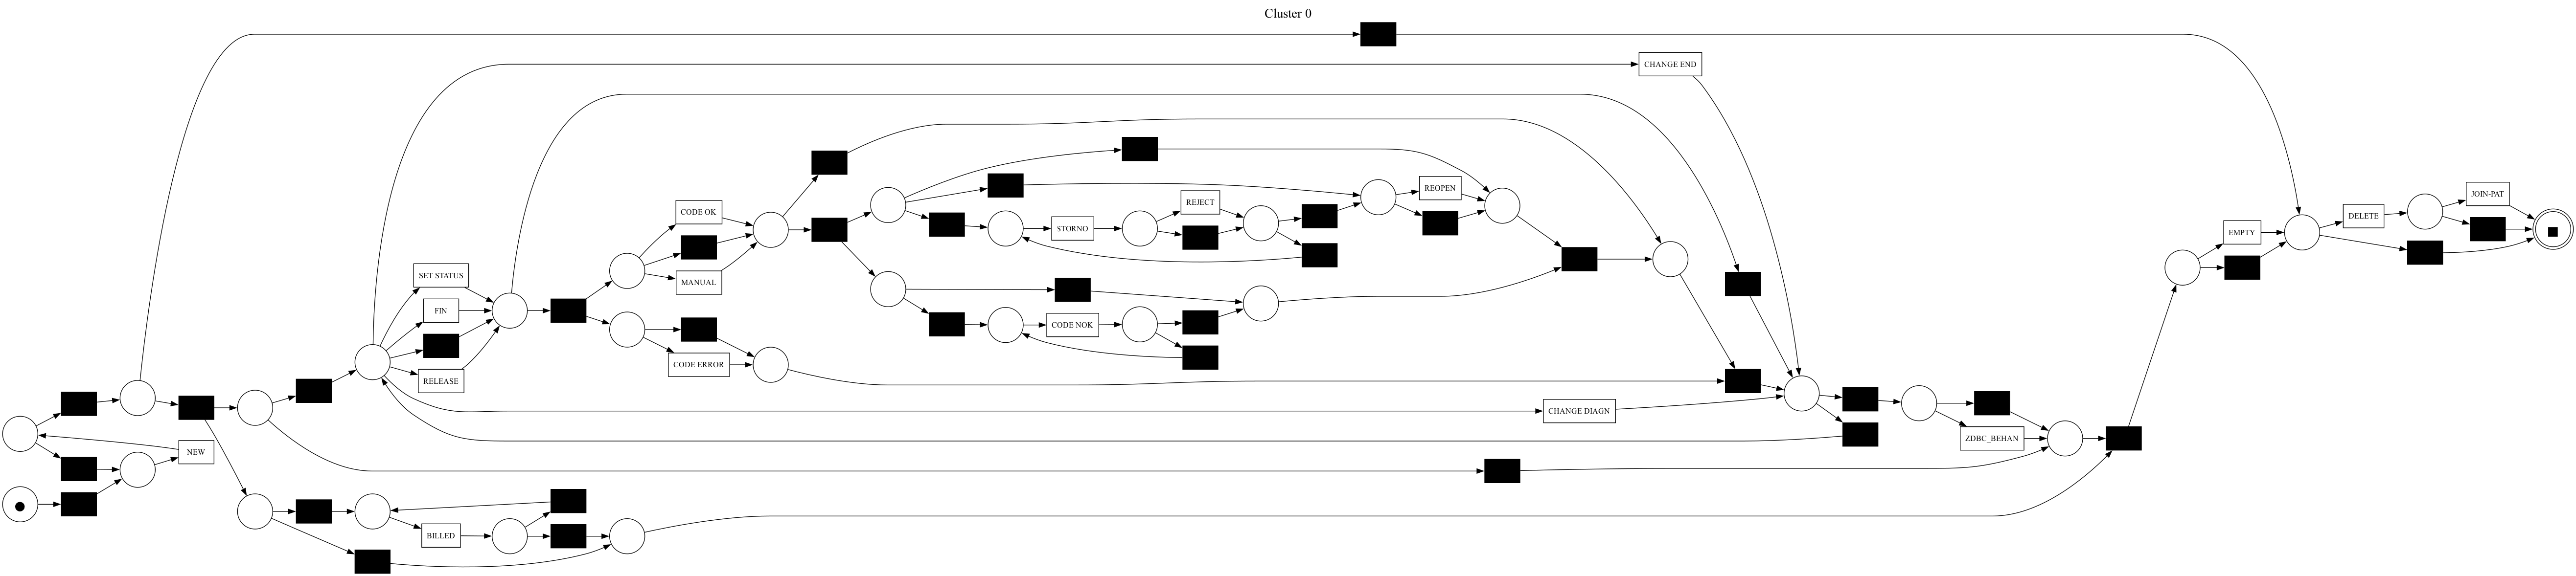

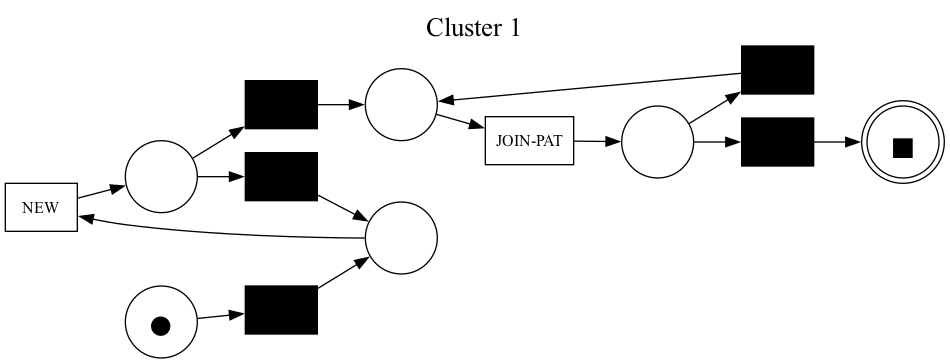

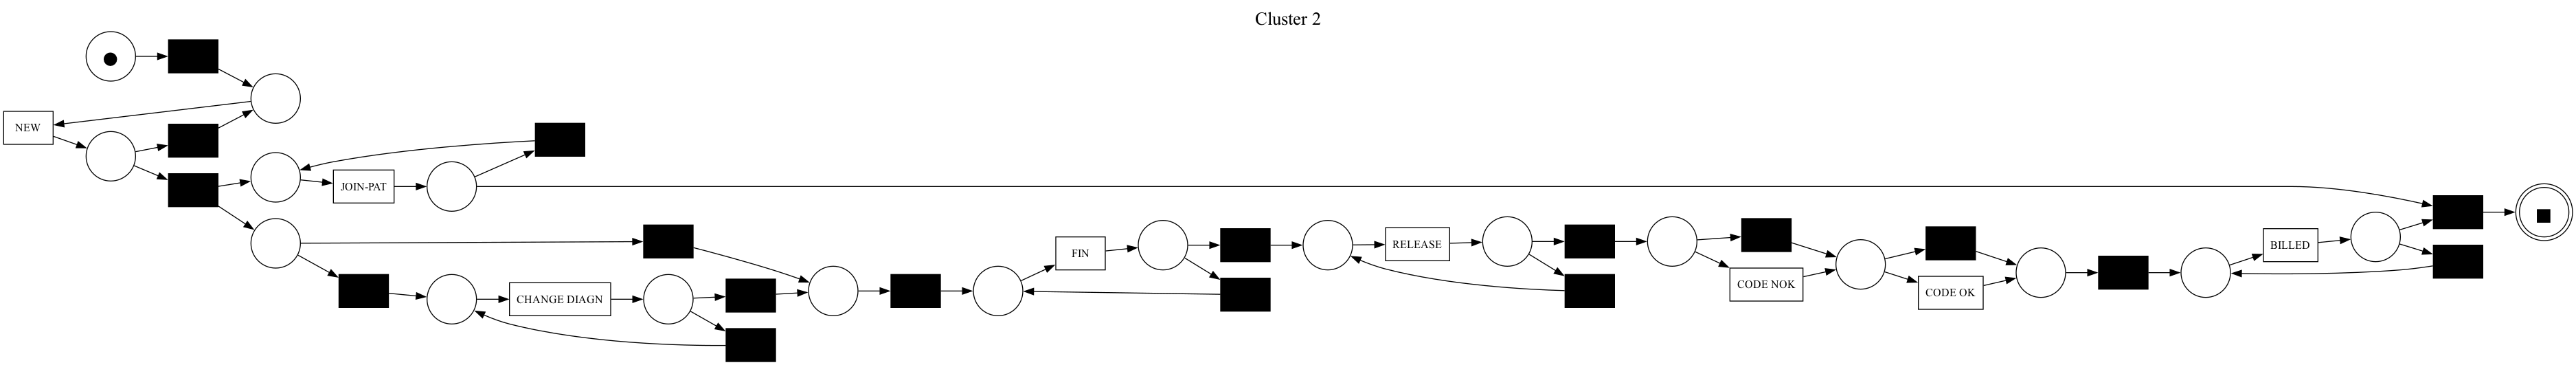

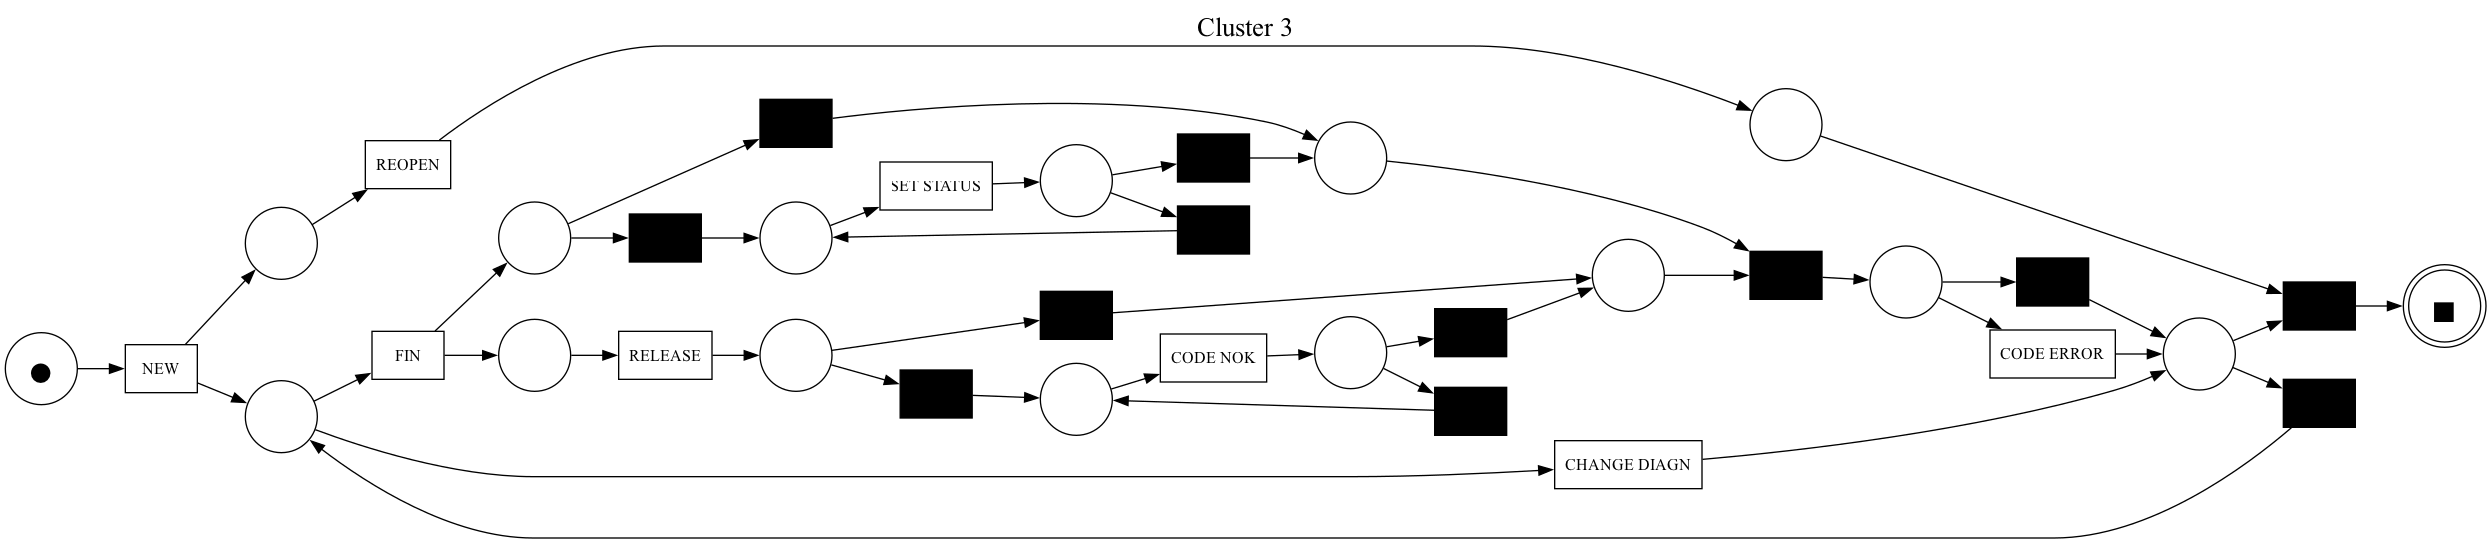

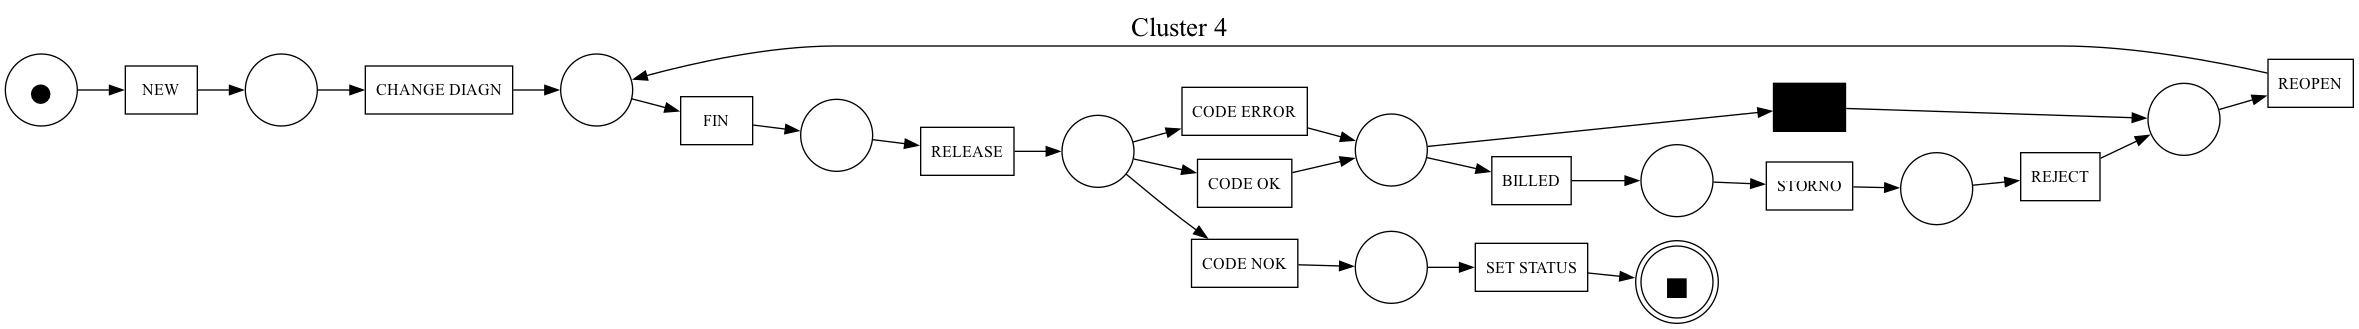

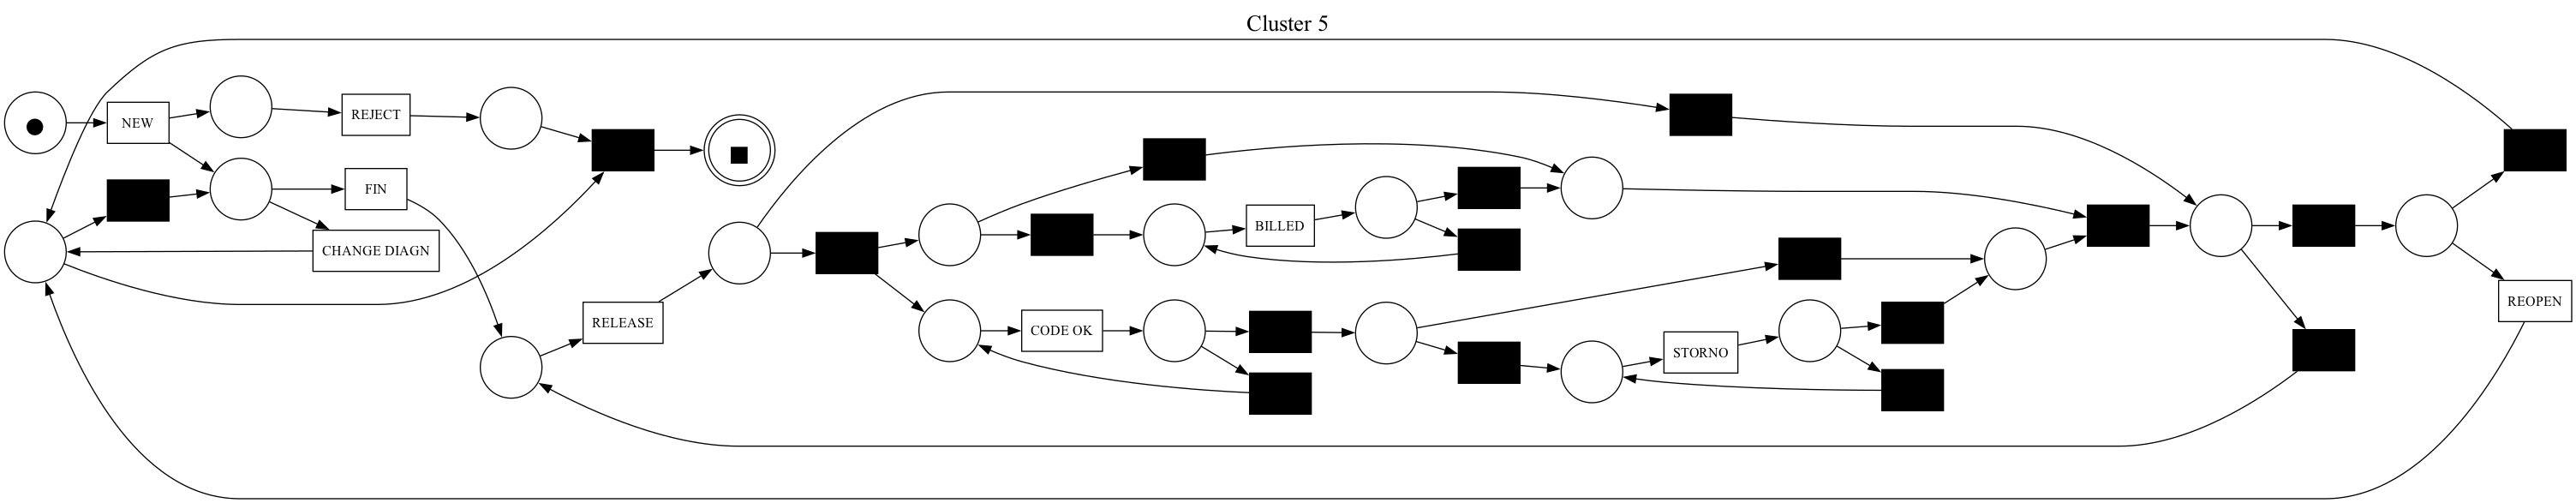

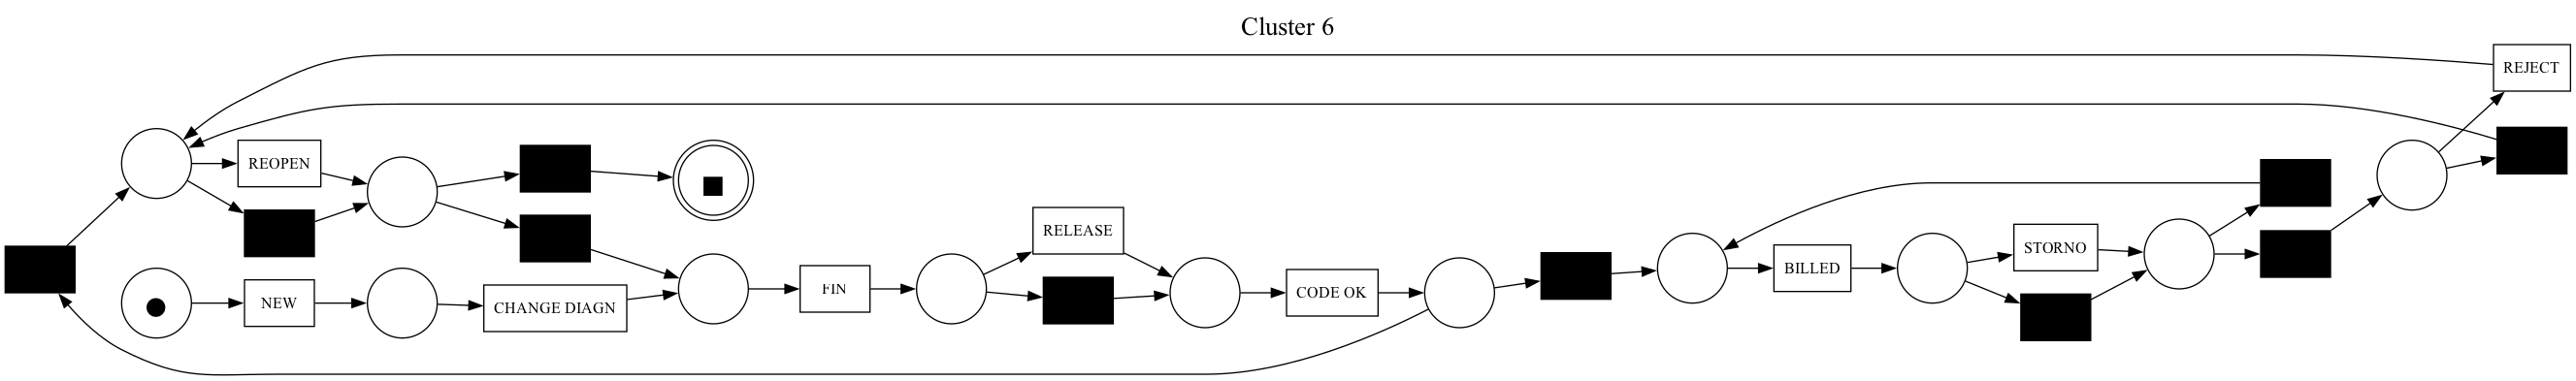

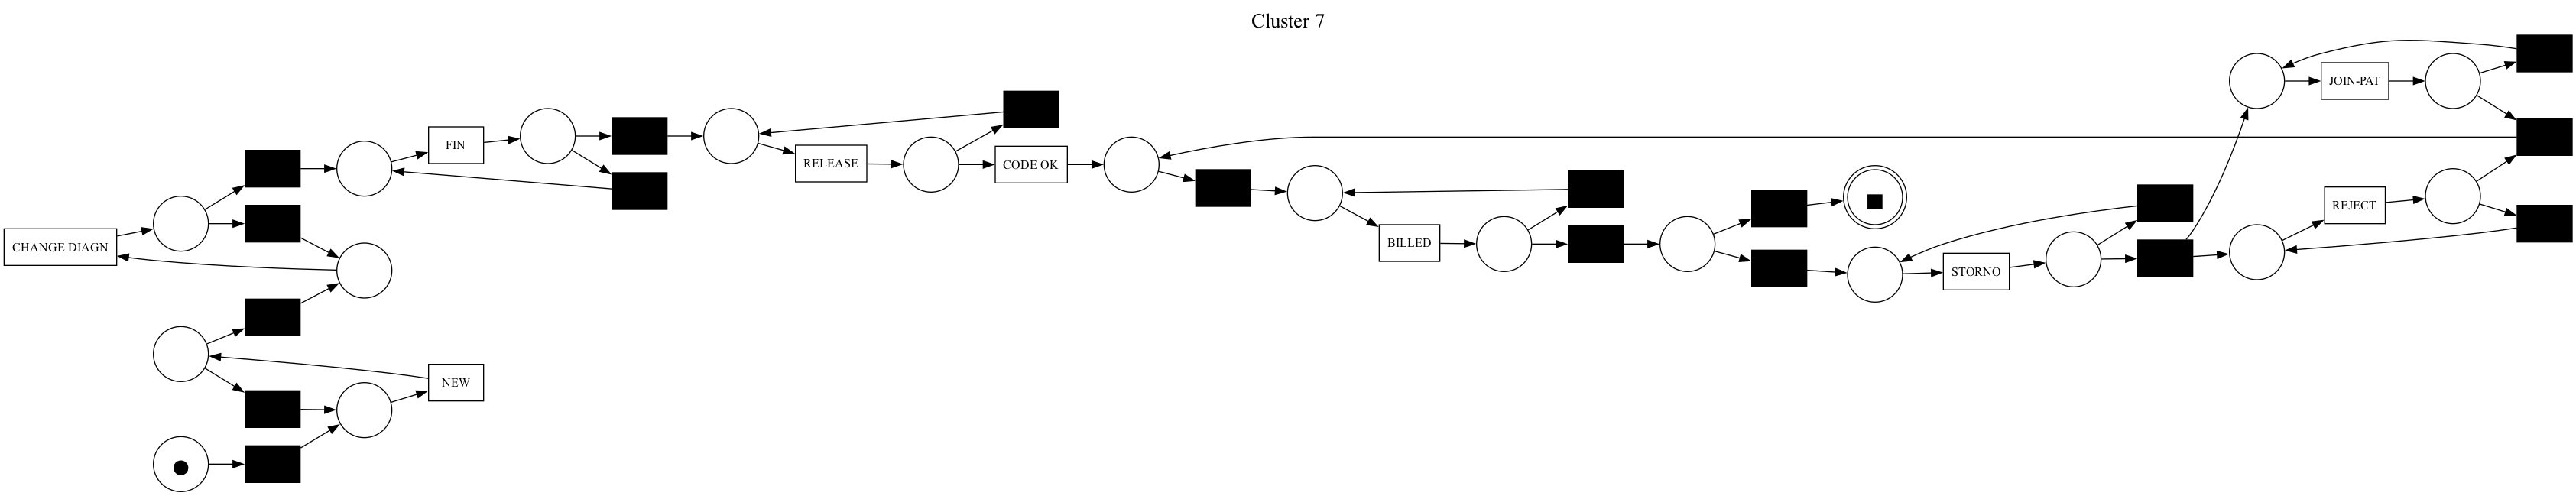

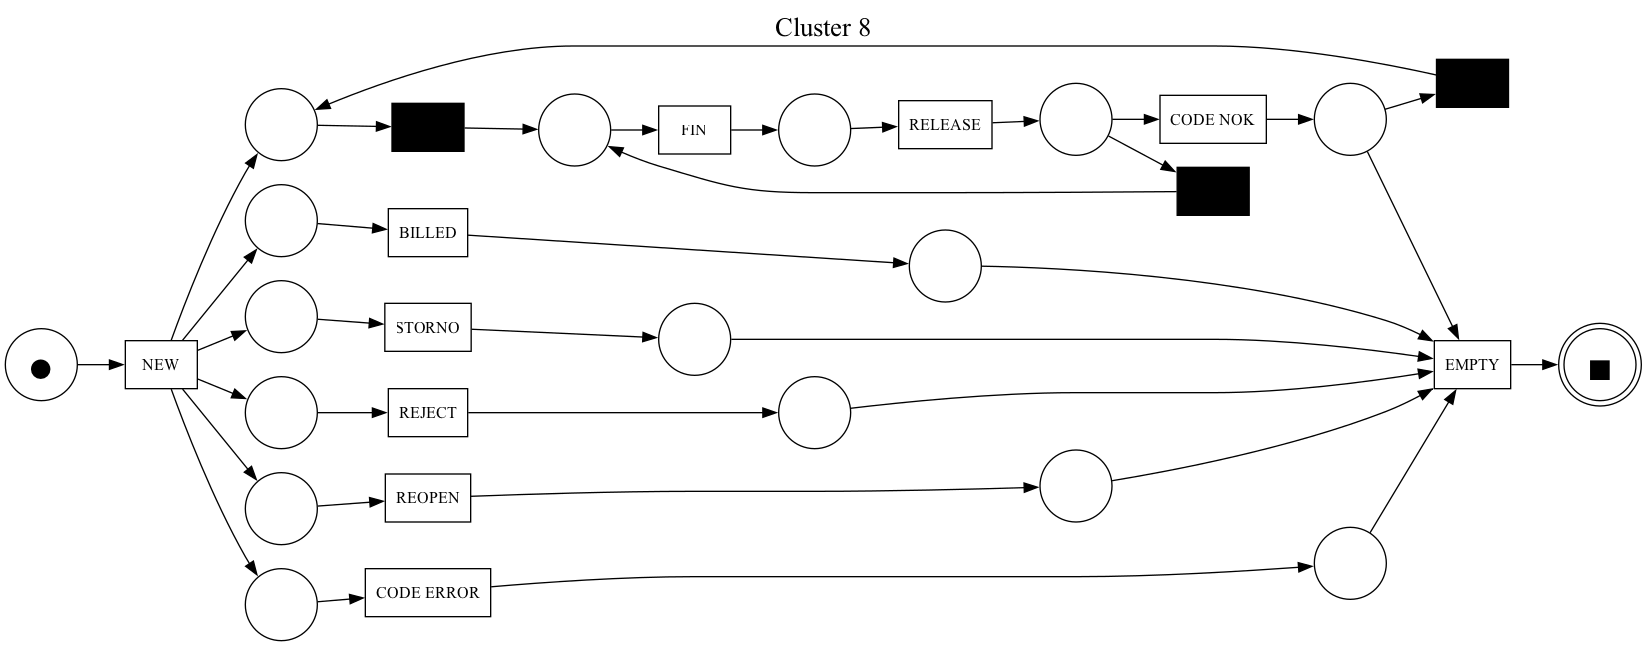

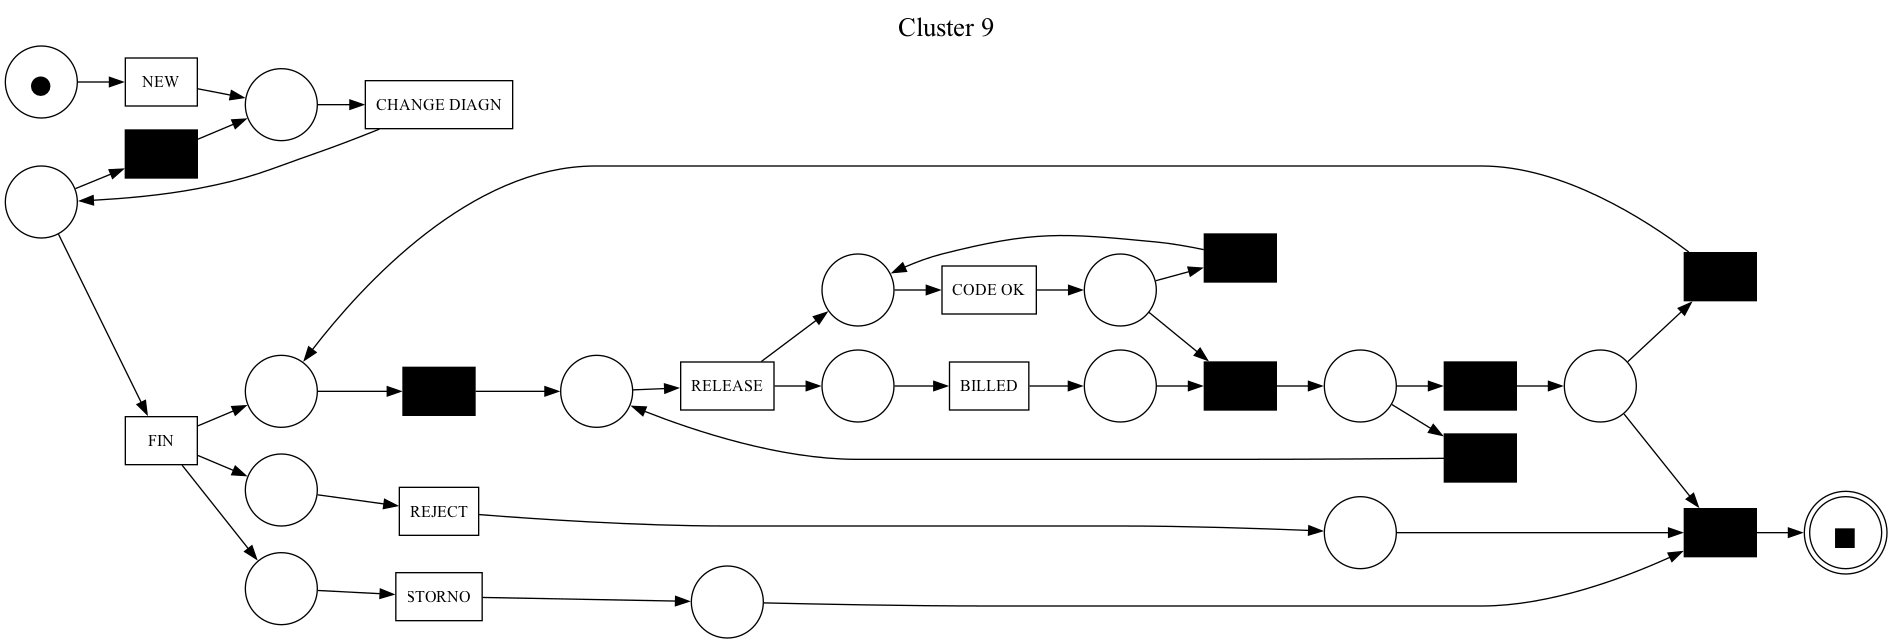

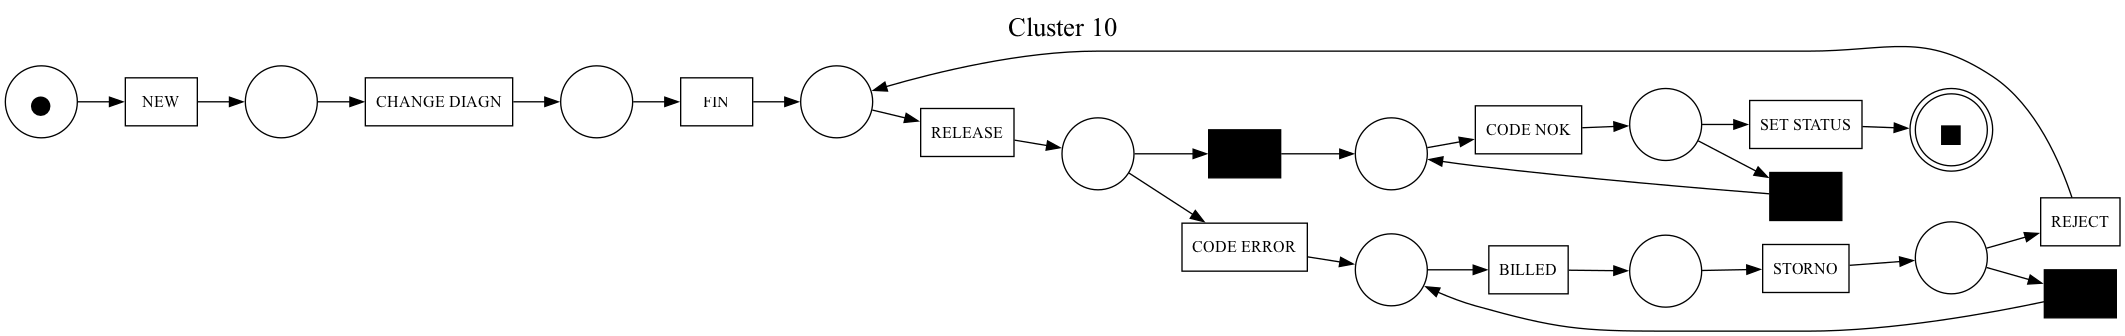

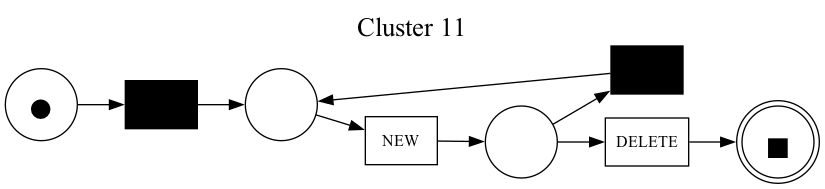

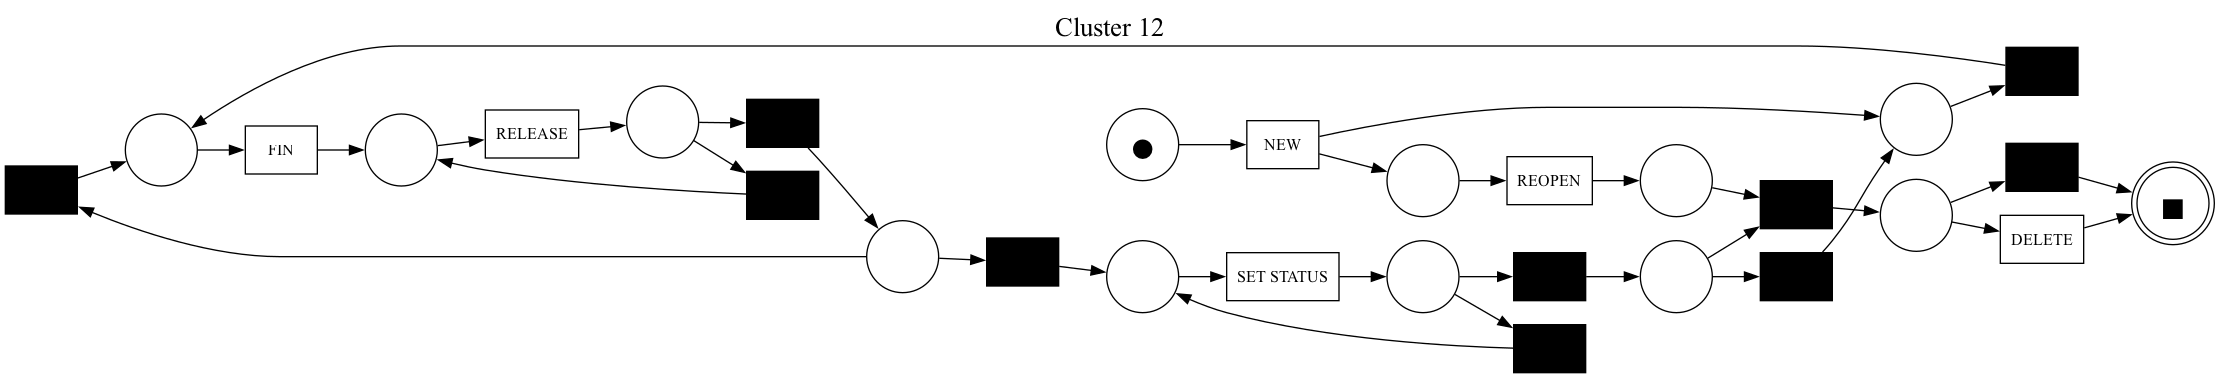

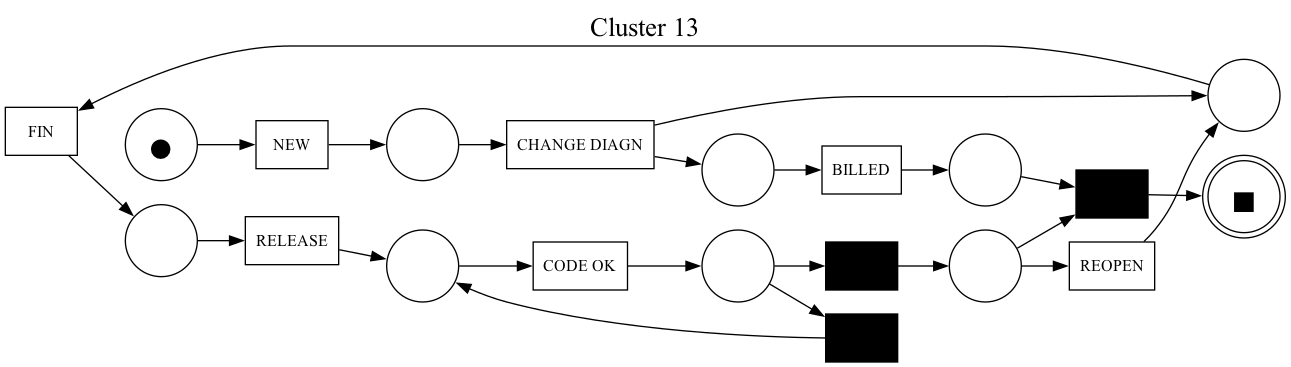

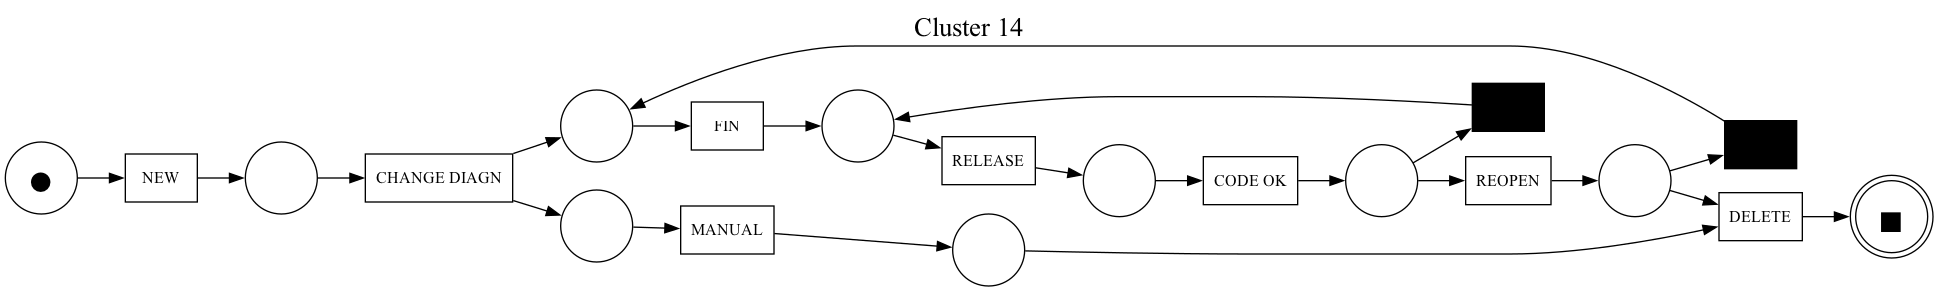

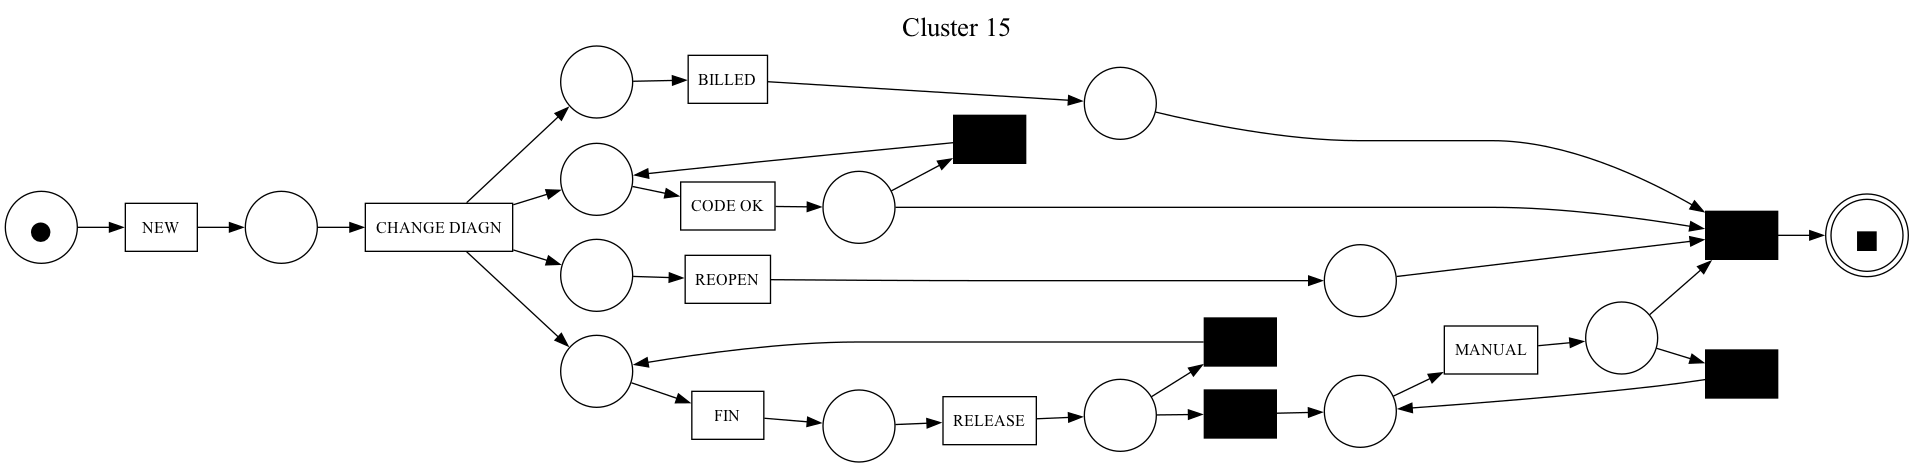

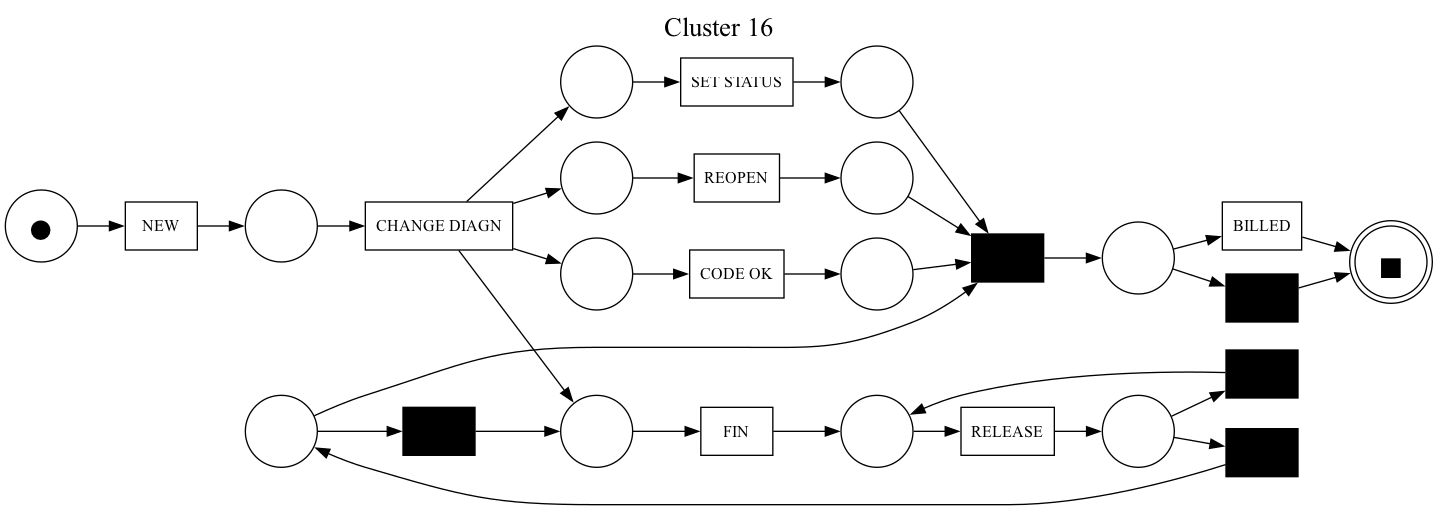

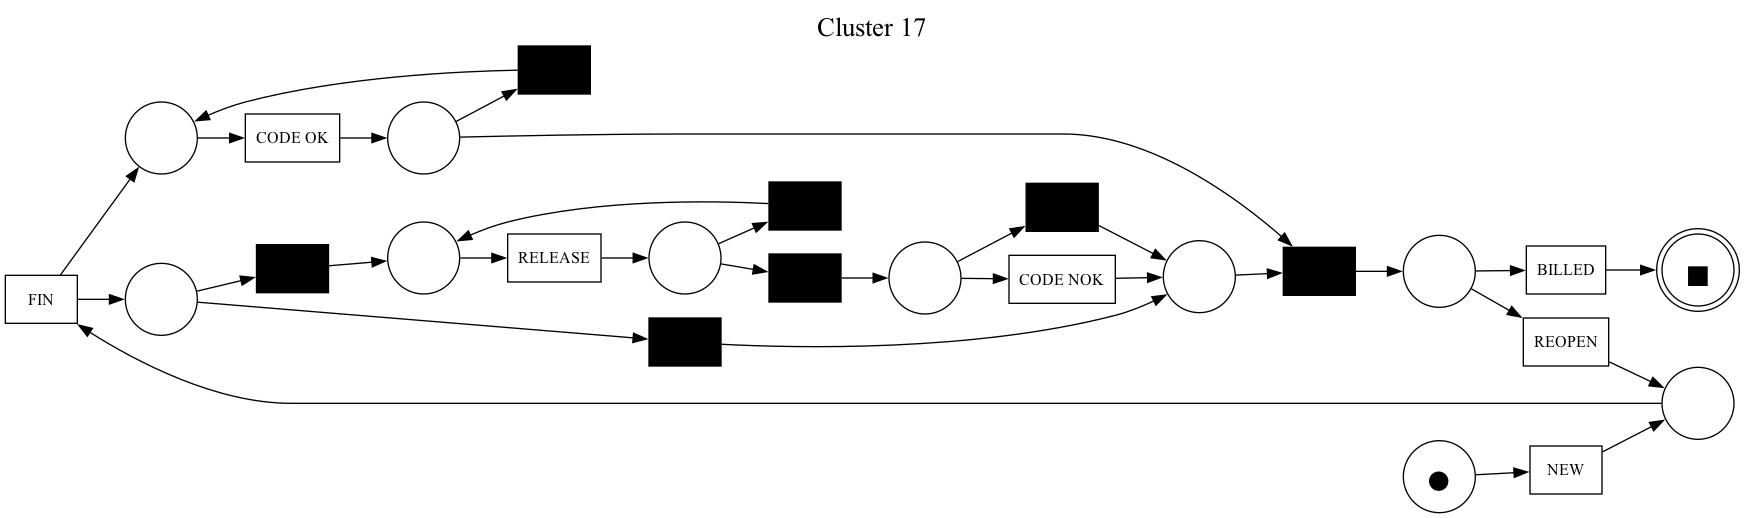

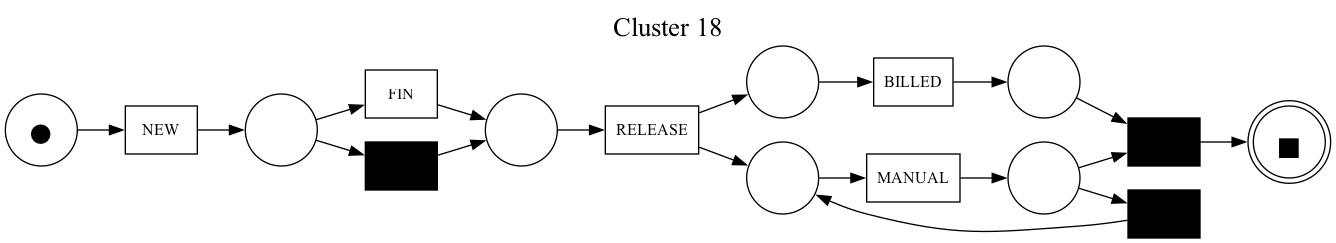

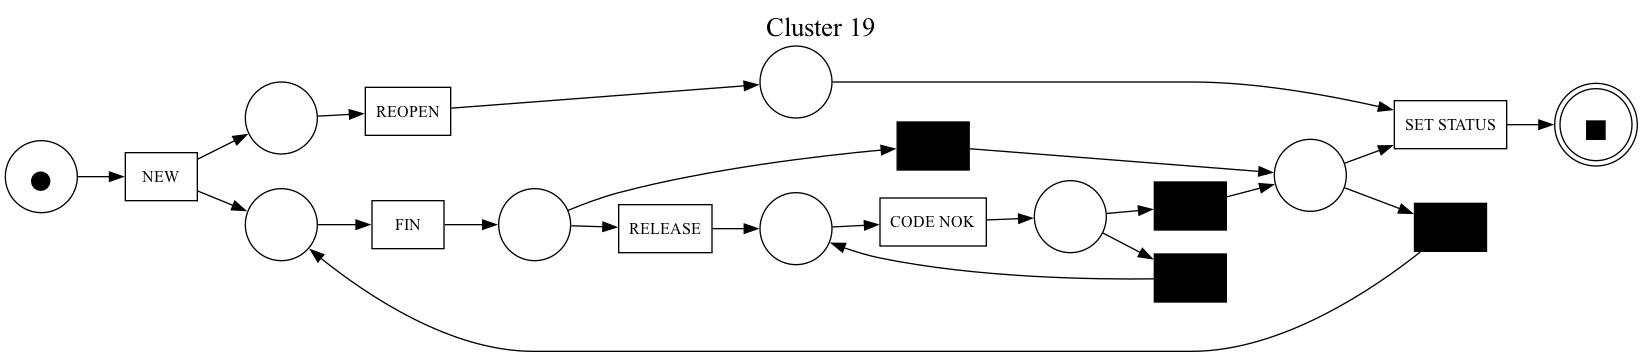

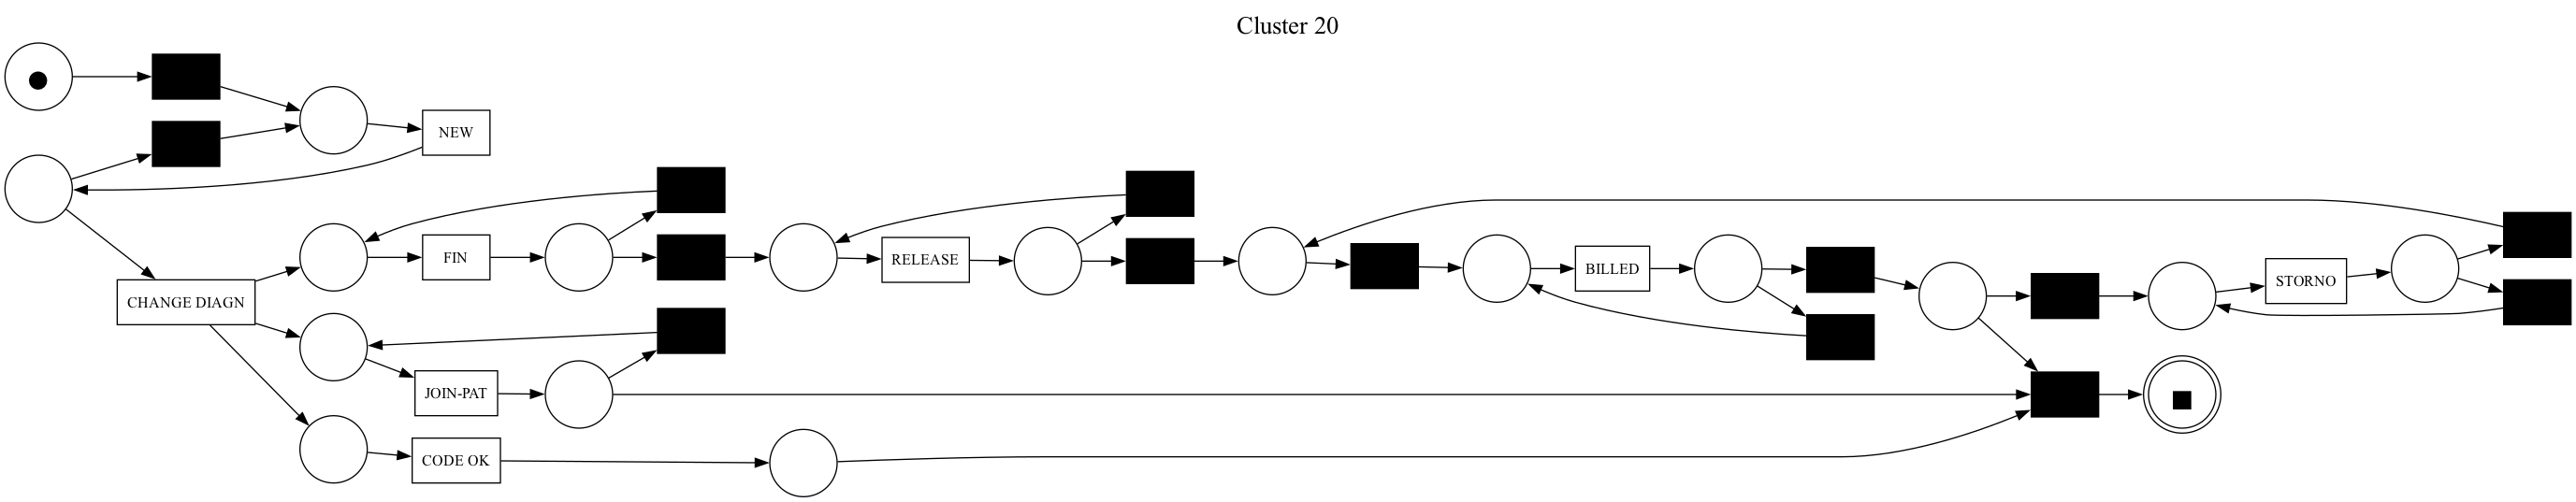

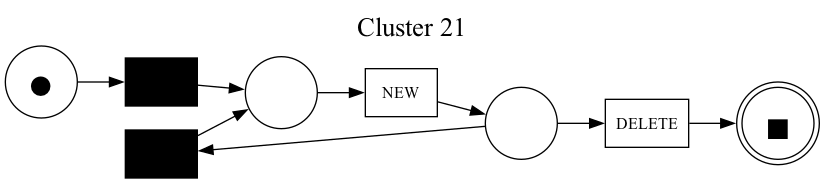

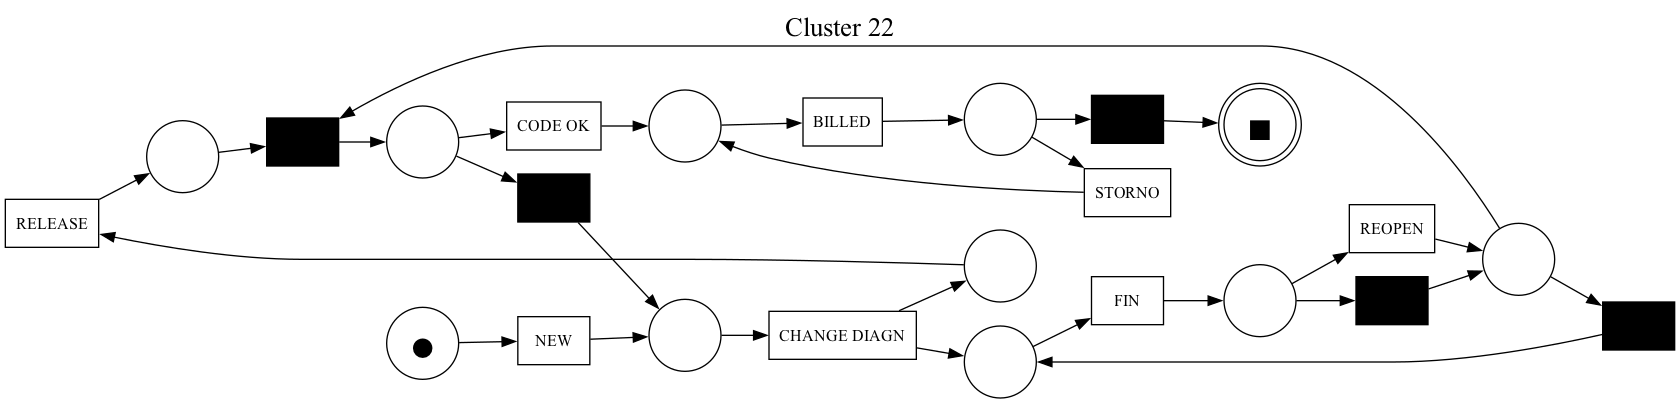

In [18]:
import pm4py
import pandas as pd
from pm4py.objects.log.obj import EventLog, Trace, Event
from pm4py.visualization.petri_net import visualizer as pm4pyvis

def create_event_log(traces):
    log = EventLog()
    for trace_tuple in traces:
        trace = Trace()
        for event_name in trace_tuple:
            event = Event({"concept:name": event_name})
            trace.append(event)
        log.append(trace)
    return log


clusters = df_sorted.groupby('Cluster')

for cluster_id, group in clusters:
    traces = group['Traces'].repeat(group['Count']).tolist()
    event_log = create_event_log(traces)
    net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
    gviz = pm4pyvis.apply(net, initial_marking, final_marking)
    gviz.graph_attr['label'] = f'Cluster {cluster_id}'
    gviz.graph_attr['labelloc'] = 't'
    gviz.graph_attr['fontsize'] = '20'
    pm4pyvis.view(gviz)